# 1. Import all Library

In [86]:
import pandas as pd
import os
from textblob import TextBlob 
from wordcloud import WordCloud
from plotly.offline import iplot
import plotly_express as px 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import bigrams, ngrams ,trigrams
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeClassifier,RidgeClassifierCV,PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
import joblib
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,OneClassSVM
from sklearn.multiclass import OutputCodeClassifier,OneVsOneClassifier,OneVsRestClassifier
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network,multiclass
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

import math
import tensorflow as tf

import pickle


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
data = pd.read_csv("post.csv")
data.head()

,0
0,"Today was a beautiful day, to have a good day ..."
1,"""Truth be told I sometimes feel awkward being ..."
2,I see lots of people arguing about when someon...
3,Via• @thatspookygirl_ What are some of your fa...
4,~Anxiety~\nWhat is it-->A common emotional sta...


In [88]:
data.columns = ['posts']
data.head()

,posts
0,"Today was a beautiful day, to have a good day ..."
1,"""Truth be told I sometimes feel awkward being ..."
2,I see lots of people arguing about when someon...
3,Via• @thatspookygirl_ What are some of your fa...
4,~Anxiety~\nWhat is it-->A common emotional sta...


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   795 non-null    object
dtypes: object(1)
memory usage: 6.3+ KB


In [90]:
data.describe()

,posts
count,795
unique,704
top,#mentalhealth #mentalhealthawareness #selfcare...
freq,17


# 2.Elimination of Punctuation, URLs, Special Character & Numbers.

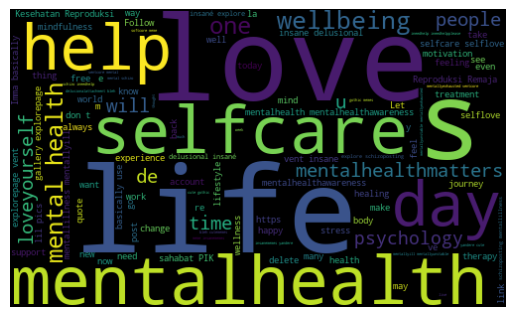

In [91]:
allwords = " ".join( [reve for reve in data['posts']])
wordcloud = WordCloud(width=500,height=300,random_state=45,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [92]:
#Removing the square brackets
def remove_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special character 
def sp_char(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing 
def final(text):
    
    text = remove_brackets(text)
    text  = sp_char(text)
    return text
#Apply function on review column on Training & Testing.
data['posts'] = data['posts'].apply(final)

In [93]:
# Converting the capital letters into lower.
data['posts'] = data['posts'].str.lower()

In [94]:
# Creating Stopwords Lists.
stop_words = set(stopwords.words("english"))
print(stop_words)

{'above', 'in', 'against', 'from', "aren't", "hasn't", 'where', 'very', 're', 'what', 'o', 'other', 'myself', 'am', 'once', 'not', 'while', 'own', 'before', 'these', 'hadn', "you'll", 'those', 'the', 'shan', 'most', "it's", 'my', 'he', 'off', 'all', "wasn't", "you'd", 'why', 'under', 'aren', 'each', 'same', 'had', 'is', 'more', 'about', 'himself', "won't", 'again', 'she', 'm', 'which', 'until', 'doesn', 'as', 'ourselves', 'yourselves', 'will', 'then', "mustn't", 'so', 'itself', "should've", 'any', 'some', 'wouldn', "mightn't", 'did', 'them', 'by', 'him', 'do', 'wasn', 'to', 'was', 'isn', 'this', 'does', 'there', 'only', 'down', 'have', 'don', 'now', 'how', 'that', 'be', 'being', 'after', 'up', 'should', "shan't", 'has', 'ain', 'll', 'here', 'during', 'are', 'if', 'who', 'over', 'been', 'no', 'ours', "that'll", 'herself', "didn't", 'doing', 'into', "haven't", 'when', "couldn't", 'shouldn', 'weren', 'me', 'having', 'couldn', 'between', 'were', 'through', 'her', 'yours', "she's", 'our', '

In [95]:
data['posts']=[word for word in data['posts'] if not word in stop_words]


In [96]:
# Remove special characters from the 'Text_Column'
data['posts'] = data['posts'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


In [97]:
def lemm(text):
    lemmatizer = WordNetLemmatizer()
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


data['posts'] = data['posts'].apply(lemm)


In [98]:
data

,posts
0,today wa a beautiful day to have a good day lg...
1,truth be told i sometimes feel awkward being a...
2,i see lot of people arguing about when someone...
3,via thatspookygirl what are some of your favor...
4,anxiety what is ita common emotional state tha...
...,...
790,at mic we dont just clean house we build lasti...
791,new shoe day cant wait to try these out saucon...
792,wellbeing wednesday new wellbeing workshop che...
793,what doe it mean to be assertive and how doe t...


In [99]:
# Function to tokenize text at the word level
def tokenize_words(text):
    return word_tokenize(text)

# Function to tokenize text at the subword level using TweetTokenizer
def tokenize_subwords(text):
    tokenizer = TweetTokenizer()
    return tokenizer.tokenize(text)

# Apply the tokenization functions to the 'posts' column
data['word_tokens'] = data['posts'].apply(tokenize_words)
data['subword_tokens'] = data['posts'].apply(tokenize_subwords)

data

,posts,word_tokens,subword_tokens
0,today wa a beautiful day to have a good day lg...,"[today, wa, a, beautiful, day, to, have, a, go...","[today, wa, a, beautiful, day, to, have, a, go..."
1,truth be told i sometimes feel awkward being a...,"[truth, be, told, i, sometimes, feel, awkward,...","[truth, be, told, i, sometimes, feel, awkward,..."
2,i see lot of people arguing about when someone...,"[i, see, lot, of, people, arguing, about, when...","[i, see, lot, of, people, arguing, about, when..."
3,via thatspookygirl what are some of your favor...,"[via, thatspookygirl, what, are, some, of, you...","[via, thatspookygirl, what, are, some, of, you..."
4,anxiety what is ita common emotional state tha...,"[anxiety, what, is, ita, common, emotional, st...","[anxiety, what, is, ita, common, emotional, st..."
...,...,...,...
790,at mic we dont just clean house we build lasti...,"[at, mic, we, dont, just, clean, house, we, bu...","[at, mic, we, dont, just, clean, house, we, bu..."
791,new shoe day cant wait to try these out saucon...,"[new, shoe, day, cant, wait, to, try, these, o...","[new, shoe, day, cant, wait, to, try, these, o..."
792,wellbeing wednesday new wellbeing workshop che...,"[wellbeing, wednesday, new, wellbeing, worksho...","[wellbeing, wednesday, new, wellbeing, worksho..."
793,what doe it mean to be assertive and how doe t...,"[what, doe, it, mean, to, be, assertive, and, ...","[what, doe, it, mean, to, be, assertive, and, ..."


In [100]:
# Flatten the list of all word tokens
all_words = [word for tokens in df['word_tokens'] for word in tokens]

# Frequency distribution
fdist = FreqDist(all_words)

# Display the most common words
print("Most Common Words:", fdist.most_common(10))

Most Common Words: [('and', 1172), ('to', 1125), ('the', 1054), ('a', 923), ('of', 657), ('you', 611), ('in', 525), ('i', 518), ('for', 426), ('your', 422)]


In [104]:
# Generate bigrams
bigram_list = list(bigrams(all_words))

# Frequency distribution for bigrams
bigram_freq = FreqDist(bigram_list)

# Display the most common bigrams
print("Most Common Bigrams:", bigram_freq.most_common(10))

# Generate Trigrams
trigrams_list = list(trigrams(all_words))

# Frequency distribution for Trigrams
trigrams_freq = FreqDist(trigrams_list)

# Display the most common Trigrams
print("Most Common Trigrams:", trigrams_freq.most_common(10))

Most Common Bigrams: [(('in', 'the'), 100), (('of', 'the'), 86), (('mental', 'health'), 85), (('mentalhealth', 'mentalhealthawareness'), 70), (('kesehatan', 'reproduksi'), 60), (('reproduksi', 'remaja'), 60), (('is', 'a'), 59), (('you', 'are'), 56), (('i', 'am'), 56), (('to', 'be'), 55)]
Most Common Trigrams: [(('kesehatan', 'reproduksi', 'remaja'), 60), (('so', 'i', 'can'), 37), (('it', 'from', 'my'), 37), (('imma', 'basically', 'use'), 36), (('basically', 'use', 'this'), 36), (('use', 'this', 'account'), 36), (('this', 'account', 'to'), 36), (('account', 'to', 'post'), 36), (('to', 'post', 'all'), 36), (('post', 'all', 'my'), 36)]


In [105]:
# Calculate term frequency (TF)
vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(data['posts'])



# Function to calculate IDF manually
def idf(matrix):
    """ Compute the IDF, given a matrix with term frequencies """
    total_docs = matrix.shape[0]
    containing_docs = (matrix > 0).sum(axis=0)
    idf_vals = np.log((total_docs / containing_docs) + 1)
    return np.squeeze(np.asarray(idf_vals))

idf_vals = idf(tf_matrix)


# Calculate TFIDF using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['posts'])

In [106]:
def entropy(matrix):
    """ Compute the entropy for each term """
    # Normalize the term frequencies for each term in each document
    probs = normalize(matrix, norm='l1', axis=0).toarray()  # Convert to dense array
    # Calculate the log probabilities
    log_probs = np.log(probs)
    log_probs[np.isneginf(log_probs)] = 0  # Replace -inf with 0 for log(0)
    # Calculate entropy
    entropy_vals = -np.multiply(probs, log_probs).sum(axis=0)
    return entropy_vals

entropy_vals = entropy(tf_matrix)

C:\Users\Aai\AppData\Local\Temp\ipykernel_2824\3237239673.py:6: RuntimeWarning:

divide by zero encountered in log



In [107]:
# Now let's print the terms with the highest and lowest metrics
terms = vectorizer.get_feature_names_out()
top_n = 30

# Sort by each metric and get the top N terms
top_tf_indices = np.argsort(tf_matrix.sum(axis=0)).A1[-top_n:]
top_idf_indices = np.argsort(idf_vals)[-top_n:]
top_tfidf_indices = np.argsort(tfidf_matrix.sum(axis=0)).A1[-top_n:]
top_entropy_indices = np.argsort(entropy_vals)[-top_n:]

In [108]:
# Print top terms for each metric
print("Top terms for Term-Frequency (TF):")
print([terms[i] for i in top_tf_indices])

print("\nTop terms for Inverse Document Frequency (IDF):")
print([terms[i] for i in top_idf_indices])

print("\nTop terms for TFIDF:")
print([terms[i] for i in top_tfidf_indices])

print("\nTop terms for Entropy:")
print([terms[i] for i in top_entropy_indices])

Top terms for Term-Frequency (TF):
['me', 'our', 'wellbeing', 'mental', 'mentalhealthmatters', 'life', 'be', 'love', 'mentalhealthawareness', 'health', 'we', 'selfcare', 'on', 'can', 'are', 'that', 'this', 'mentalhealth', 'my', 'with', 'it', 'is', 'your', 'for', 'in', 'you', 'of', 'the', 'to', 'and']

Top terms for Inverse Document Frequency (IDF):
['mekanizma', 'couch', 'menofgod', 'cough', 'menfulnessuk', 'mencari', 'menatalhealth', 'council', 'memphis', 'memperbaiki', 'counselingcoach', 'memorize', 'memorial', 'memorable', 'memoir', 'memesdaily', 'counselingcoachorg', 'membuktikan', 'counselingmurrieta', 'memberikan', 'counselingoffice', 'memahami', 'counselingspringtexas', 'melisse', 'melihat', 'counselingworks', 'melasma', 'melalui', 'menopausehealth', 'zzzzs']

Top terms for TFIDF:
['quote', 'we', 'are', 'can', 'that', 'mental', 'wellbeing', 'with', 'this', 'psychology', 'health', 'life', 'selflove', 'selfcare', 'love', 'it', 'is', 'mentalhealthawareness', 'my', 'for', 'loveyours

# 3.Data Analysis & Visualization

In [109]:
# Creating a function to get subjectivity 

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creating a function to get Polarity 

def Polarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['posts'].apply(subjectivity)
data['Polarity'] = data['posts'].apply(Polarity)

In [110]:
px.scatter(data,x ='Polarity',y='Subjectivity')

In [111]:
polarity_bins = pd.cut(data['Polarity'], bins=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1], 
                       labels=["-100% to -80%", "-80% to -60%", "-60% to -40%", "-40% to -20%", 
                               "-20% to 0%", "0% to 20%", "20% to 40%", "40% to 60%", 
                               "60% to 80%", "80% to 100%"])

# Calculate the percentage of posts in each bin
polarity_distribution = polarity_bins.value_counts(normalize=True) * 100

# Display the distribution
print(polarity_distribution)



Polarity
-20% to 0%       35.597484
0% to 20%        22.264151
20% to 40%       17.861635
40% to 60%       13.836478
60% to 80%        5.911950
-40% to -20%      3.018868
-60% to -40%      0.628931
80% to 100%       0.628931
-100% to -80%     0.251572
-80% to -60%      0.000000
Name: proportion, dtype: float64


In [112]:
subjectivity_bins = pd.cut(data['Subjectivity'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], 
                           labels=["0% to 20%", "20% to 40%", "40% to 60%", 
                                   "60% to 80%", "80% to 100%"])

# Calculate the percentage of posts in each bin for subjectivity
subjectivity_distribution = subjectivity_bins.value_counts(normalize=True) * 100

# Output the distribution of subjectivity
print(subjectivity_distribution)

Subjectivity
40% to 60%     46.925566
60% to 80%     21.197411
20% to 40%     15.533981
0% to 20%      10.194175
80% to 100%     6.148867
Name: proportion, dtype: float64


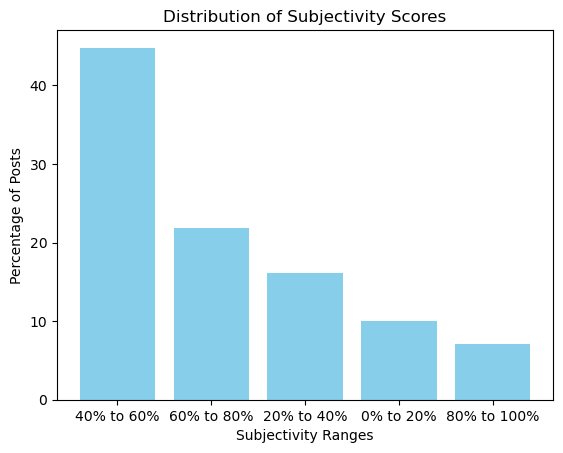

In [113]:
# Given subjectivity distribution data
subjectivity_distribution = {
    "40% to 60%": 44.805195,
    "60% to 80%": 21.915584,
    "20% to 40%": 16.071429,
    "0% to 20%": 10.064935,
    "80% to 100%": 7.142857
}

# Create a bar chart
plt.bar(subjectivity_distribution.keys(), subjectivity_distribution.values(), color='skyblue')

# Add title and labels
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Ranges')
plt.ylabel('Percentage of Posts')

# Show the plot
plt.show()


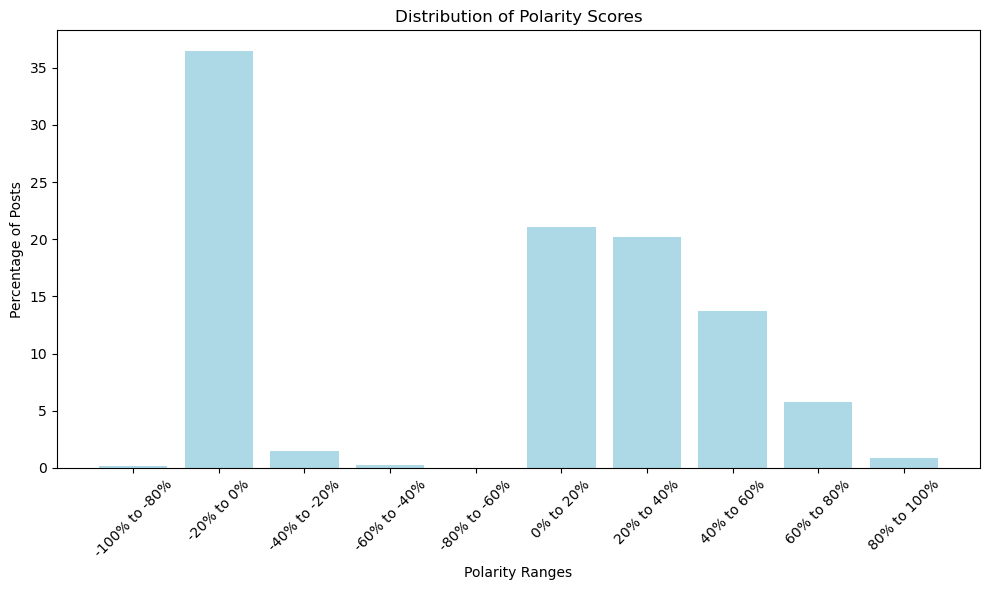

In [114]:
polarity_distribution = {
    "-20% to 0%": 36.443884,
    "0% to 20%": 21.059269,
    "20% to 40%": 20.176545,
    "40% to 60%": 13.745271,
    "60% to 80%": 5.800757,
    "-40% to -20%": 1.513241,
    "80% to 100%": 0.882724,
    "-60% to -40%": 0.252207,
    "-100% to -80%": 0.126103,
    "-80% to -60%": 0.000000
}

# Convert the dictionary to a Series for easier plotting
polarity_series = pd.Series(polarity_distribution)

# Sort the series by index for a neat ordered plot
polarity_series = polarity_series.sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(polarity_series.index, polarity_series.values, color='lightblue')

# Add title and labels
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Ranges')
plt.ylabel('Percentage of Posts')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

# 4. VADER System

In [115]:
# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

for index, row in data.iterrows():
    text = row['posts']
    
    # Get the sentiment score
    sentiment_dict = analyzer.polarity_scores(text)
    
    # Decide sentiment as positive, negative, or neutral 
    if sentiment_dict['compound'] >= 0.05:
        data.at[index, 'Sentiment'] = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        data.at[index, 'Sentiment'] = "Negative"
    else:
        data.at[index, 'Sentiment'] = "Neutral"


In [116]:
data

,posts,word_tokens,subword_tokens,Subjectivity,Polarity,Sentiment
0,today wa a beautiful day to have a good day lg...,"[today, wa, a, beautiful, day, to, have, a, go...","[today, wa, a, beautiful, day, to, have, a, go...",0.600000,0.750000,Positive
1,truth be told i sometimes feel awkward being a...,"[truth, be, told, i, sometimes, feel, awkward,...","[truth, be, told, i, sometimes, feel, awkward,...",0.560417,0.108333,Positive
2,i see lot of people arguing about when someone...,"[i, see, lot, of, people, arguing, about, when...","[i, see, lot, of, people, arguing, about, when...",0.535294,0.129412,Neutral
3,via thatspookygirl what are some of your favor...,"[via, thatspookygirl, what, are, some, of, you...","[via, thatspookygirl, what, are, some, of, you...",1.000000,0.500000,Positive
4,anxiety what is ita common emotional state tha...,"[anxiety, what, is, ita, common, emotional, st...","[anxiety, what, is, ita, common, emotional, st...",0.446779,0.132638,Positive
...,...,...,...,...,...,...
790,at mic we dont just clean house we build lasti...,"[at, mic, we, dont, just, clean, house, we, bu...","[at, mic, we, dont, just, clean, house, we, bu...",0.400000,0.248810,Positive
791,new shoe day cant wait to try these out saucon...,"[new, shoe, day, cant, wait, to, try, these, o...","[new, shoe, day, cant, wait, to, try, these, o...",0.454545,0.136364,Positive
792,wellbeing wednesday new wellbeing workshop che...,"[wellbeing, wednesday, new, wellbeing, worksho...","[wellbeing, wednesday, new, wellbeing, worksho...",0.438889,0.068182,Positive
793,what doe it mean to be assertive and how doe t...,"[what, doe, it, mean, to, be, assertive, and, ...","[what, doe, it, mean, to, be, assertive, and, ...",0.687500,-0.312500,Positive


In [117]:
data['Sentiment']

0      Positive
1      Positive
2       Neutral
3      Positive
4      Positive
         ...   
790    Positive
791    Positive
792    Positive
793    Positive
794    Positive
Name: Sentiment, Length: 795, dtype: object

In [118]:
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [119]:
unique_class_counts = data['Sentiment'].value_counts()

# Print the unique value counts
print(unique_class_counts)

Sentiment
Positive    532
Negative    150
Neutral     113
Name: count, dtype: int64


In [120]:
px.bar(x=data["Sentiment"])

In [121]:
mapping = {'Neutral':0,'Positive':1 ,'Negative':2}
data['Sentiment'].replace(mapping,inplace=True)



In [122]:
data

,posts,word_tokens,subword_tokens,Subjectivity,Polarity,Sentiment
0,today wa a beautiful day to have a good day lg...,"[today, wa, a, beautiful, day, to, have, a, go...","[today, wa, a, beautiful, day, to, have, a, go...",0.600000,0.750000,1
1,truth be told i sometimes feel awkward being a...,"[truth, be, told, i, sometimes, feel, awkward,...","[truth, be, told, i, sometimes, feel, awkward,...",0.560417,0.108333,1
2,i see lot of people arguing about when someone...,"[i, see, lot, of, people, arguing, about, when...","[i, see, lot, of, people, arguing, about, when...",0.535294,0.129412,0
3,via thatspookygirl what are some of your favor...,"[via, thatspookygirl, what, are, some, of, you...","[via, thatspookygirl, what, are, some, of, you...",1.000000,0.500000,1
4,anxiety what is ita common emotional state tha...,"[anxiety, what, is, ita, common, emotional, st...","[anxiety, what, is, ita, common, emotional, st...",0.446779,0.132638,1
...,...,...,...,...,...,...
790,at mic we dont just clean house we build lasti...,"[at, mic, we, dont, just, clean, house, we, bu...","[at, mic, we, dont, just, clean, house, we, bu...",0.400000,0.248810,1
791,new shoe day cant wait to try these out saucon...,"[new, shoe, day, cant, wait, to, try, these, o...","[new, shoe, day, cant, wait, to, try, these, o...",0.454545,0.136364,1
792,wellbeing wednesday new wellbeing workshop che...,"[wellbeing, wednesday, new, wellbeing, worksho...","[wellbeing, wednesday, new, wellbeing, worksho...",0.438889,0.068182,1
793,what doe it mean to be assertive and how doe t...,"[what, doe, it, mean, to, be, assertive, and, ...","[what, doe, it, mean, to, be, assertive, and, ...",0.687500,-0.312500,1


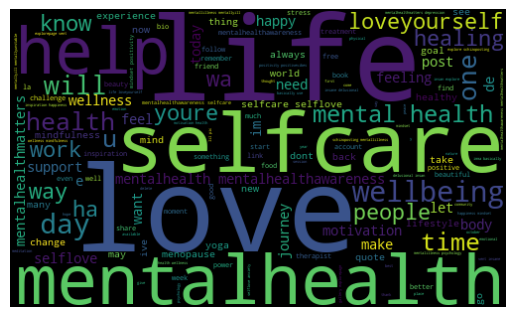

In [123]:
postive_data = data[data.Sentiment == 1]['posts']
allwords = " ".join( [reve for reve in postive_data])
wordcloud = WordCloud(width=500,height=300,random_state=45,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

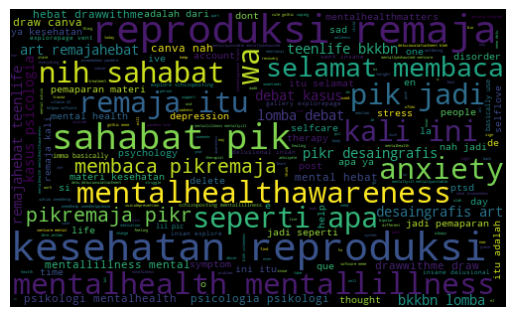

In [124]:
negative_data = data[data.Sentiment == 2]['posts']
allwords = " ".join( [reve for reve in negative_data])
wordcloud = WordCloud(width=500,height=300,random_state=45,max_font_size=120).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [125]:
training , testing = train_test_split(data,test_size=0.15,random_state=42,shuffle=True)
training , validation = train_test_split(training,test_size=0.15,random_state=42,shuffle=True)

print(f'training Data:{training.shape},testing Data:{testing.shape},validation Data:{validation.shape}')

training Data:(573, 6),testing Data:(120, 6),validation Data:(102, 6)


In [126]:
training

,posts,word_tokens,subword_tokens,Subjectivity,Polarity,Sentiment
175,een trouwe klant verjaart vandaag en komt lang...,"[een, trouwe, klant, verjaart, vandaag, en, ko...","[een, trouwe, klant, verjaart, vandaag, en, ko...",0.100000,0.000000,0
719,you dont need a clean slate but you do gotta p...,"[you, dont, need, a, clean, slate, but, you, d...","[you, dont, need, a, clean, slate, but, you, d...",0.650000,0.433333,1
526,mentalhealth mentalhealthawareness selfcare se...,"[mentalhealth, mentalhealthawareness, selfcare...","[mentalhealth, mentalhealthawareness, selfcare...",0.600000,0.666667,1
70,everything we do in life ha an impact either t...,"[everything, we, do, in, life, ha, an, impact,...","[everything, we, do, in, life, ha, an, impact,...",0.458604,0.084686,1
299,happy heavenly 30th birthday to my baby brothe...,"[happy, heavenly, 30th, birthday, to, my, baby...","[happy, heavenly, 30th, birthday, to, my, baby...",0.500000,0.400000,1
...,...,...,...,...,...,...
393,free moveon love loveyourself lovequotes lovei...,"[free, moveon, love, loveyourself, lovequotes,...","[free, moveon, love, loveyourself, lovequotes,...",0.600000,0.250000,1
6,if your dream dont scare you they are way to s...,"[if, your, dream, dont, scare, you, they, are,...","[if, your, dream, dont, scare, you, they, are,...",0.540000,0.230000,1
507,jak czsto zdarza ci si mwi do siebie ale ty je...,"[jak, czsto, zdarza, ci, si, mwi, do, siebie, ...","[jak, czsto, zdarza, ci, si, mwi, do, siebie, ...",0.000000,0.000000,1
672,a the summer heat rise our body naturally lose...,"[a, the, summer, heat, rise, our, body, natura...","[a, the, summer, heat, rise, our, body, natura...",0.400000,0.244444,2


In [127]:
testing

,posts,word_tokens,subword_tokens,Subjectivity,Polarity,Sentiment
691,wellness wednesday or halloween you choose cle...,"[wellness, wednesday, or, halloween, you, choo...","[wellness, wednesday, or, halloween, you, choo...",0.000000,0.000000,1
662,matching the nail to the new ring nlsbymaria,"[matching, the, nail, to, the, new, ring, nlsb...","[matching, the, nail, to, the, new, ring, nlsb...",0.454545,0.136364,0
63,life is a series of chapter and sometimes the ...,"[life, is, a, series, of, chapter, and, someti...","[life, is, a, series, of, chapter, and, someti...",0.415000,0.090000,1
531,specialist in recruitment for the social care ...,"[specialist, in, recruitment, for, the, social...","[specialist, in, recruitment, for, the, social...",0.333333,0.266667,1
66,peaceofmind innerstrength mentalhealthawarenes...,"[peaceofmind, innerstrength, mentalhealthaware...","[peaceofmind, innerstrength, mentalhealthaware...",0.000000,0.000000,0
...,...,...,...,...,...,...
110,love yourself loveyourself perfect beautiful w...,"[love, yourself, loveyourself, perfect, beauti...","[love, yourself, loveyourself, perfect, beauti...",0.866667,0.783333,1
281,hello everyone today we continue our weekly we...,"[hello, everyone, today, we, continue, our, we...","[hello, everyone, today, we, continue, our, we...",0.666667,0.566667,1
479,a happy fall piece i just finished waterblog w...,"[a, happy, fall, piece, i, just, finished, wat...","[a, happy, fall, piece, i, just, finished, wat...",1.000000,0.800000,1
209,i have to be honest with you i havent felt tru...,"[i, have, to, be, honest, with, you, i, havent...","[i, have, to, be, honest, with, you, i, havent...",0.531780,0.162083,1


In [128]:
validation

,posts,word_tokens,subword_tokens,Subjectivity,Polarity,Sentiment
534,mutlu gnler gnlk yaamda erteleme davranlar ile...,"[mutlu, gnler, gnlk, yaamda, erteleme, davranl...","[mutlu, gnler, gnlk, yaamda, erteleme, davranl...",0.350000,0.200000,1
124,self care day love selfcare beauty loveyoursel...,"[self, care, day, love, selfcare, beauty, love...","[self, care, day, love, selfcare, beauty, love...",0.800000,0.675000,1
435,you dont want to miss this titleholder talk at...,"[you, dont, want, to, miss, this, titleholder,...","[you, dont, want, to, miss, this, titleholder,...",0.033333,0.016667,2
755,here some wednesday wellness prompt for the we...,"[here, some, wednesday, wellness, prompt, for,...","[here, some, wednesday, wellness, prompt, for,...",0.000000,0.000000,1
579,azamshirzadpsy psychology childpsychology pare...,"[azamshirzadpsy, psychology, childpsychology, ...","[azamshirzadpsy, psychology, childpsychology, ...",0.000000,0.000000,0
...,...,...,...,...,...,...
730,it thankful thursday evolvetherapies evolvethe...,"[it, thankful, thursday, evolvetherapies, evol...","[it, thankful, thursday, evolvetherapies, evol...",0.733333,0.433333,1
313,hey friend exciting news interfaiths steve mon...,"[hey, friend, exciting, news, interfaiths, ste...","[hey, friend, exciting, news, interfaiths, ste...",0.431566,0.181439,1
342,you are worth fighting for peaksrecoverycenter...,"[you, are, worth, fighting, for, peaksrecovery...","[you, are, worth, fighting, for, peaksrecovery...",0.100000,0.300000,2
686,dentro di noi sono giorni bui anche se fuori i...,"[dentro, di, noi, sono, giorni, bui, anche, se...","[dentro, di, noi, sono, giorni, bui, anche, se...",0.333333,0.166667,1


In [129]:
training = training.drop(['Subjectivity','Polarity','subword_tokens','word_tokens'],axis = True)
testing = testing.drop(['Subjectivity','Polarity','subword_tokens','word_tokens'],axis = True)
validation = validation.drop(['Subjectivity','Polarity','subword_tokens','word_tokens'],axis = True)


In [130]:
training

,posts,Sentiment
175,een trouwe klant verjaart vandaag en komt lang...,0
719,you dont need a clean slate but you do gotta p...,1
526,mentalhealth mentalhealthawareness selfcare se...,1
70,everything we do in life ha an impact either t...,1
299,happy heavenly 30th birthday to my baby brothe...,1
...,...,...
393,free moveon love loveyourself lovequotes lovei...,1
6,if your dream dont scare you they are way to s...,1
507,jak czsto zdarza ci si mwi do siebie ale ty je...,1
672,a the summer heat rise our body naturally lose...,2


In [131]:
training.to_csv("training",index=False)
testing.to_csv("testing",index=False)
validation.to_csv("validation",index=False)

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def compute_performance(y_true, y_pred):
    """
    Prints different performance metrics like Accuracy, Recall (macro), Precision (macro), and F1 (macro).
    This also displays Confusion Matrix with proper X & Y axis labels.
    Also, returns F1 score.

    Args:
        y_true: numpy array or list
        y_pred: numpy array or list

    Returns:
        float
    """
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    return f1,acc,recall,precision,cm


def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([f"Training {arr[idx][0]}", f"Validation {arr[idx][0]}", f"Training {arr[idx][1]}", f"Validation {arr[idx][1]}"], fontsize=18)
        ax[idx].set_xlabel('Epochs ',fontsize=16)
        ax[idx].set_ylabel('',fontsize=16)

In [133]:
def train_method1(train_file, val_file, model_dir):
    """
    Trains multiple machine learning models, evaluates their performance using the F1 score,
    and saves the best-performing model.
    
    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory

    Returns:
        None
    """
    

    # Load train and validation data
    train_data = pd.read_csv(train_file)
    valid_data = pd.read_csv(val_file)

    train_data = train_data.dropna(subset=['posts'])
    valid_data = valid_data.dropna(subset=['posts'])
    

    tokenizer = Tokenizer(num_words=100000)
    tokenizer.fit_on_texts(train_data['posts'])
    word_index = tokenizer.word_index
    X_train = tokenizer.texts_to_sequences(train_data['posts'])
    X_valid = tokenizer.texts_to_sequences(valid_data['posts'])
    X_train = pad_sequences(X_train, maxlen=300, padding='post')
    X_valid = pad_sequences(X_valid, maxlen=300, padding='post')

    # Convert labels to numpy arrays
    y_train = np.array(train_data['Sentiment'])
    y_valid = np.array(valid_data['Sentiment'])


    # Load pre-trained embeddings
    embeddings_index = {}
    with open('D:/Dissertation/shumbam/glove.6B-20231023T173315Z-001/glove.6B/glove.6B.300d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    # Create embedding matrix
    embedding_dim = 300
    num_words = min(300000, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= num_words:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # Define models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'SVM': SVC(probability=True),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }

   # Initialize variables to store the best model and scores
    best_f1 = 0
    best_accuracy = 0
    best_model_name = ''
    best_model = None

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        
        # Calculate F1 Score
        f1 = f1_score(y_valid, y_pred, average='weighted')
        print(f"{model_name} F1 Score: {f1:.2f}")
        
        # Calculate Accuracy
        accuracy = accuracy_score(y_valid, y_pred)
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        
        # Update best scores and model if current model is better
        if f1 > best_f1:
            best_f1 = f1
            best_accuracy = accuracy  # Store the corresponding accuracy
            best_model_name = model_name
            best_model = model


    # Save the best model
    joblib.dump(best_model, model_dir + '/best_model.sav')
    print(f"The best model is {best_model_name} with F1 Score: {best_f1:.2f} Acuuracy:{best_accuracy:.2f}")
    print(f"Model saved to : {model_dir}/best_model.sav")


In [134]:
train_file = "training"
valid_file = "validation"
model_dir = "D:/Dissertation/shumbam/model"

train_method1(train_file=train_file,val_file=valid_file,model_dir=model_dir)

Random Forest F1 Score: 0.66
Random Forest Accuracy: 0.68
SVM F1 Score: 0.61
SVM Accuracy: 0.70
Gradient Boosting F1 Score: 0.62
Gradient Boosting Accuracy: 0.63


c:\Users\Aai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression F1 Score: 0.51
Logistic Regression Accuracy: 0.48
The best model is Random Forest with F1 Score: 0.66 Acuuracy:0.68
Model saved to : D:/Dissertation/shumbam/model/best_model.sav


In [135]:
def test_method1(test_file, model_file, output_dir,Vectorizer):
    """
    Load a trained model and evaluate it on a test set, then save the output to a file.

    Args:
        test_file (str): The path to the CSV file containing the test data.
        model_file (str): The path to the saved Keras model file.
        output_dir (str): The path to the directory where the output file should be saved.
    """
    ## Load the test data and model
    test_data = pd.read_csv(test_file)
    # Convert tweets to padded sequences
    tokenizer = Tokenizer(num_words=100000)
    tokenizer.fit_on_texts(test_data['posts'])
    word_index = tokenizer.word_index
    X_test = tokenizer.texts_to_sequences(test_data['posts'])
    X_test = pad_sequences(X_test, maxlen=300, padding='post')
    # Convert labels to numpy arrays
    y_test = np.array(test_data['Sentiment'])
    joblib.dump(word_index, Vectorizer + '/Vectorizer.sav')
    print(f'Vector saved to : {Vectorizer}')
    model = joblib.load(model_file)
    print(f'Model loaded from: {model_dir}')
    # Generate predictions on the test data
    y_pred_prob = model.predict(X_test)
    test_data['Class'] = y_pred_prob
    y_pred = np.round(y_pred_prob).flatten()
    compute_performance(y_test, y_pred)

   # Save the output to a file
    output_file = os.path.join(output_dir, "output_filename.csv")
    test_data.to_csv(output_file, index=False)
    print(f'Output saved to : {output_file}')

In [136]:
test_file = "testing"
model_file = "D:/Dissertation/shumbam/model/best_model.sav"
output_dir = "D:/Dissertation/shumbam/model/"
Vectorizer = "D:/Dissertation/shumbam/model/"

test_method1(test_file=test_file,model_file=model_file,output_dir=output_dir,Vectorizer=Vectorizer)

Vector saved to : D:/Dissertation/shumbam/model/
Model loaded from: D:/Dissertation/shumbam/model
Accuracy: 0.7750
Recall: 0.5400
Precision: 0.8064
F1-score: 0.5602
Confusion Matrix:
 [[10  8  0]
 [ 6 81  0]
 [ 0 13  2]]
Output saved to : D:/Dissertation/shumbam/model/output_filename.csv


In [137]:
test = pd.read_csv("model/output_filename.csv")
test

,posts,Sentiment,Class
0,wellness wednesday or halloween you choose cle...,1,1
1,matching the nail to the new ring nlsbymaria,0,0
2,life is a series of chapter and sometimes the ...,1,1
3,specialist in recruitment for the social care ...,1,1
4,peaceofmind innerstrength mentalhealthawarenes...,0,0
...,...,...,...
115,love yourself loveyourself perfect beautiful w...,1,0
116,hello everyone today we continue our weekly we...,1,1
117,a happy fall piece i just finished waterblog w...,1,1
118,i have to be honest with you i havent felt tru...,1,1


In [138]:
mapping = {0:'Neutral',1:'Positive',2:'Negative'}
test['Sentiment'].replace(mapping,inplace=True)
test['Class'].replace(mapping,inplace=True)

In [139]:
test

,posts,Sentiment,Class
0,wellness wednesday or halloween you choose cle...,Positive,Positive
1,matching the nail to the new ring nlsbymaria,Neutral,Neutral
2,life is a series of chapter and sometimes the ...,Positive,Positive
3,specialist in recruitment for the social care ...,Positive,Positive
4,peaceofmind innerstrength mentalhealthawarenes...,Neutral,Neutral
...,...,...,...
115,love yourself loveyourself perfect beautiful w...,Positive,Neutral
116,hello everyone today we continue our weekly we...,Positive,Positive
117,a happy fall piece i just finished waterblog w...,Positive,Positive
118,i have to be honest with you i havent felt tru...,Positive,Positive


In [140]:
sentiment_unique = test['Sentiment'].value_counts()
class_unique = test['Class'].value_counts()


# Print the unique value counts
print(f"Sentiment:{sentiment_unique}\n Class:{class_unique}")

Sentiment:Sentiment
Positive    87
Neutral     18
Negative    15
Name: count, dtype: int64
 Class:Class
Positive    102
Neutral      16
Negative      2
Name: count, dtype: int64


In [141]:
px.bar(x=test["Sentiment"])

In [142]:
px.bar(x=test["Class"])

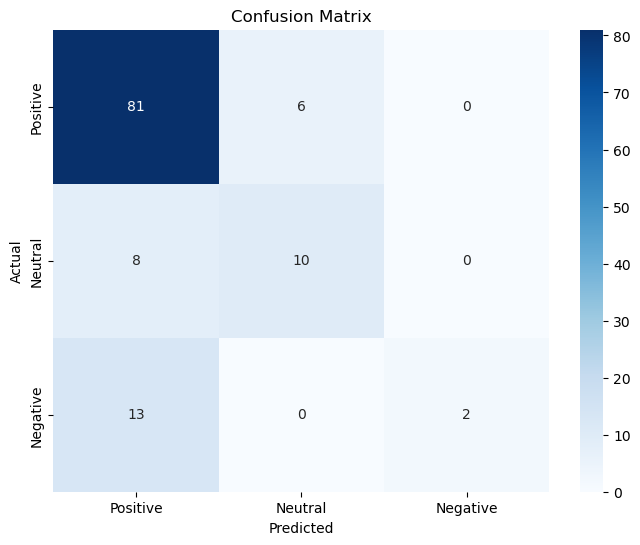

In [143]:
# Compute confusion matrix
cm = confusion_matrix(test['Sentiment'], test['Class'], labels=['Positive', 'Neutral', 'Negative'])

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

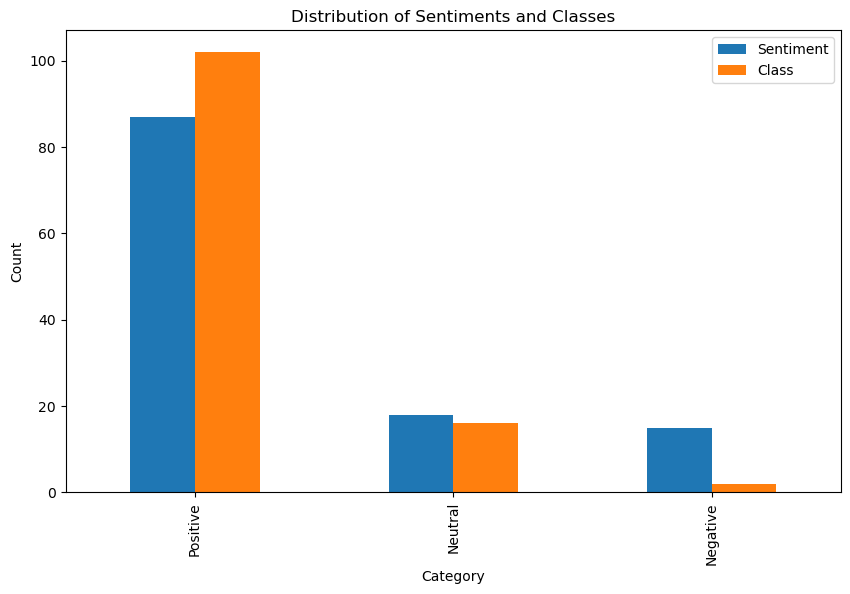

In [144]:
# Count the occurrences
sentiment_counts = test['Sentiment'].value_counts()
class_counts = test['Class'].value_counts()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Sentiment': sentiment_counts, 'Class': class_counts})

# Plot
df_plot.plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Sentiments and Classes')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()


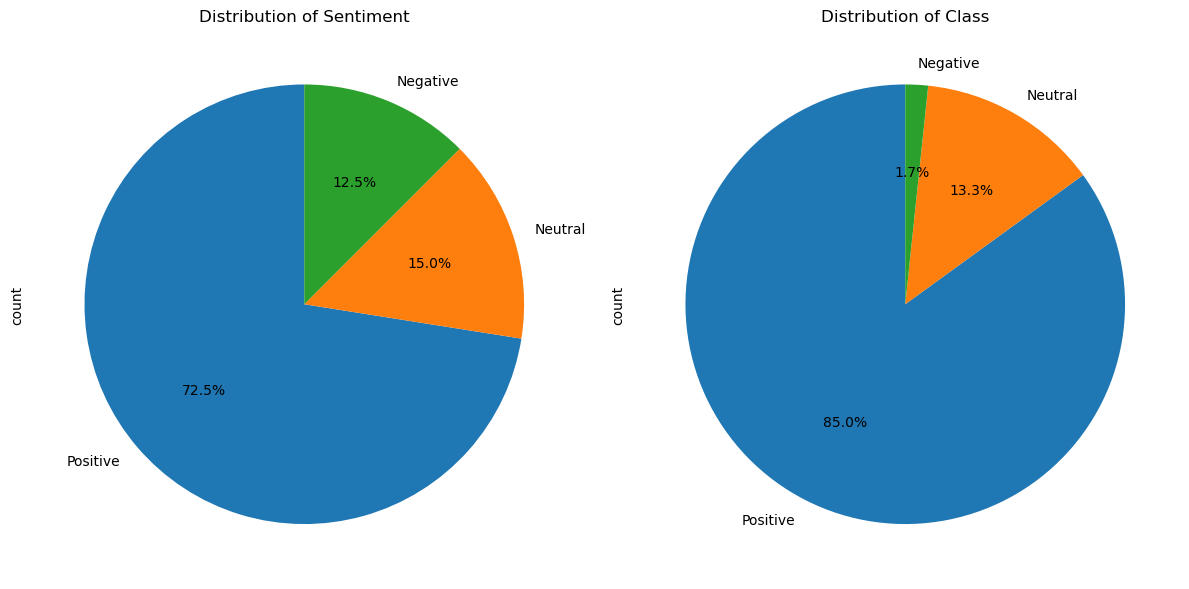

In [145]:
# For Sentiment
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
test['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment')

# For Class
plt.subplot(1, 2, 2)
test['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class')

plt.tight_layout()
plt.show()

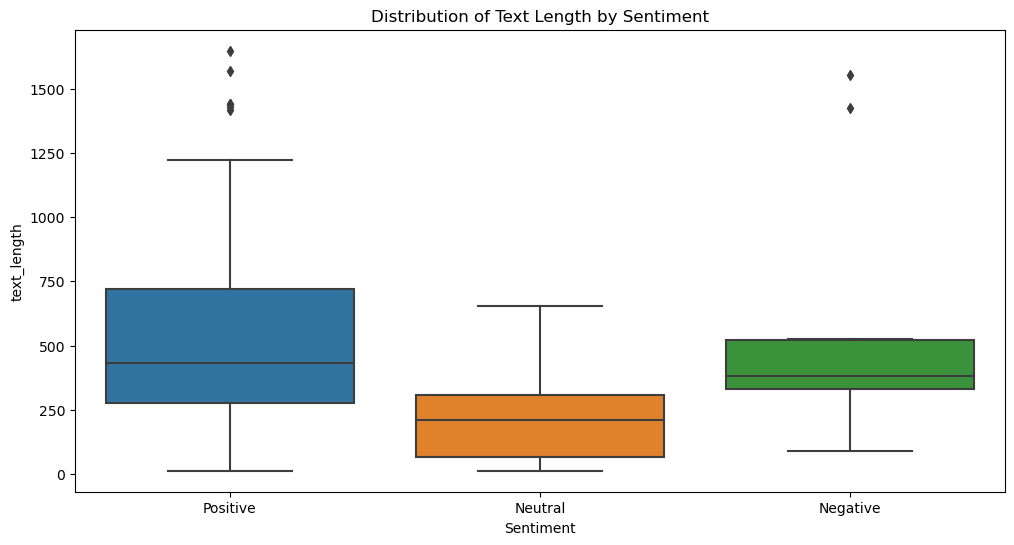

In [146]:
# Calculate text length
test['text_length'] = test['posts'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(data=test, x='Sentiment', y='text_length')
plt.title('Distribution of Text Length by Sentiment')
plt.show()

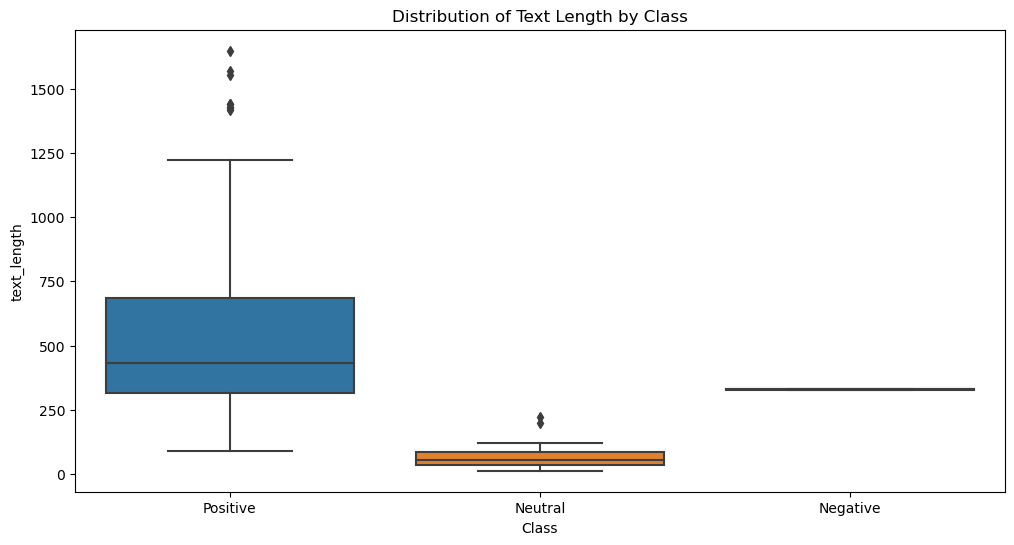

In [147]:
# Calculate text length
test['text_length'] = test['posts'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(data=test, x='Class', y='text_length')
plt.title('Distribution of Text Length by Class')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


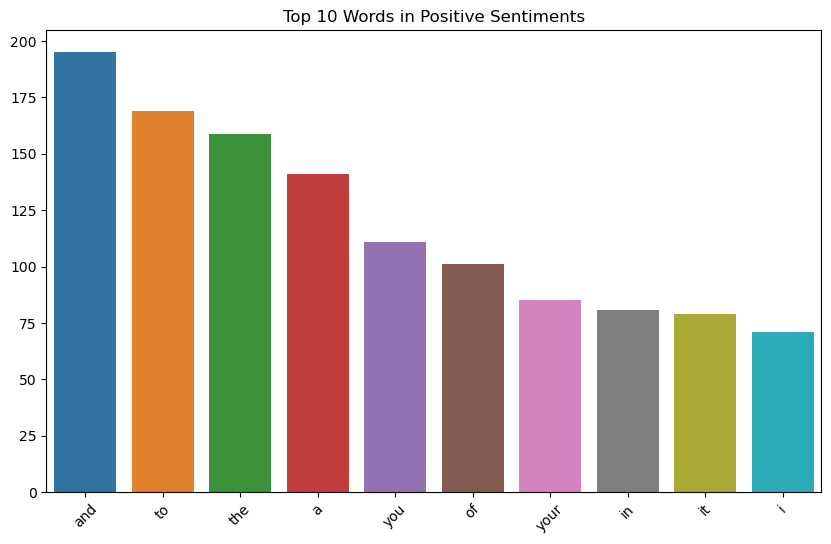

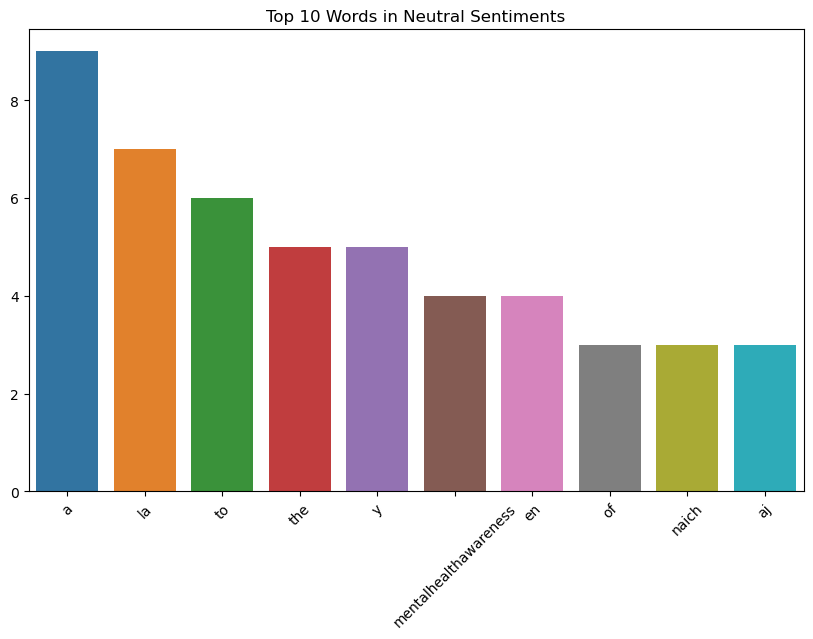

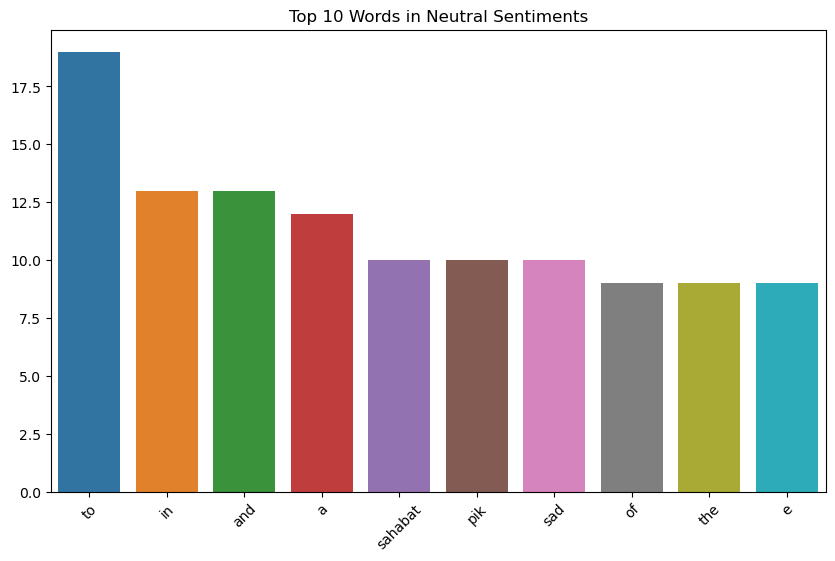

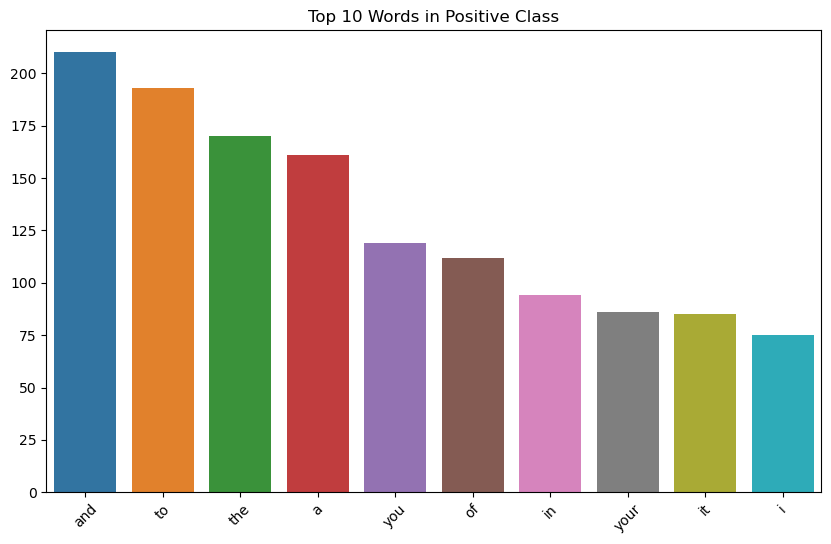

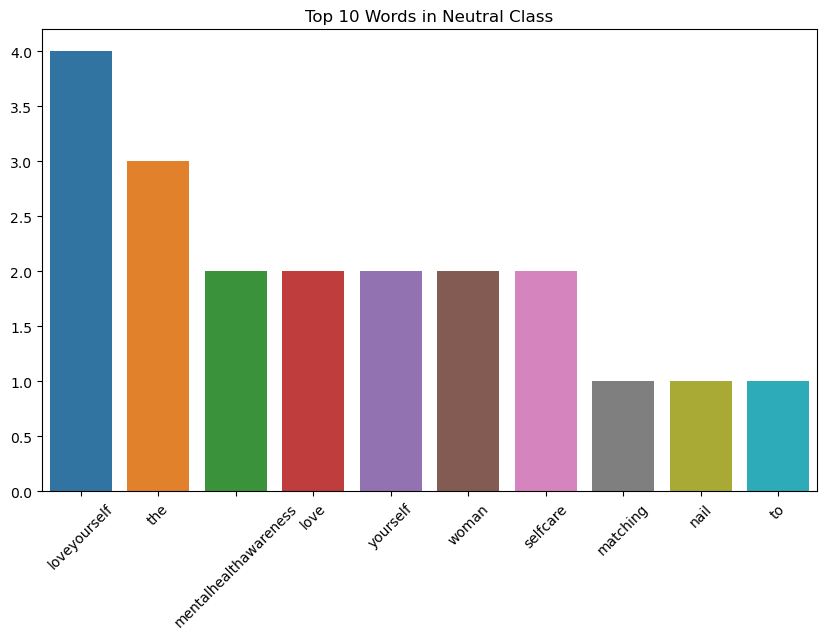

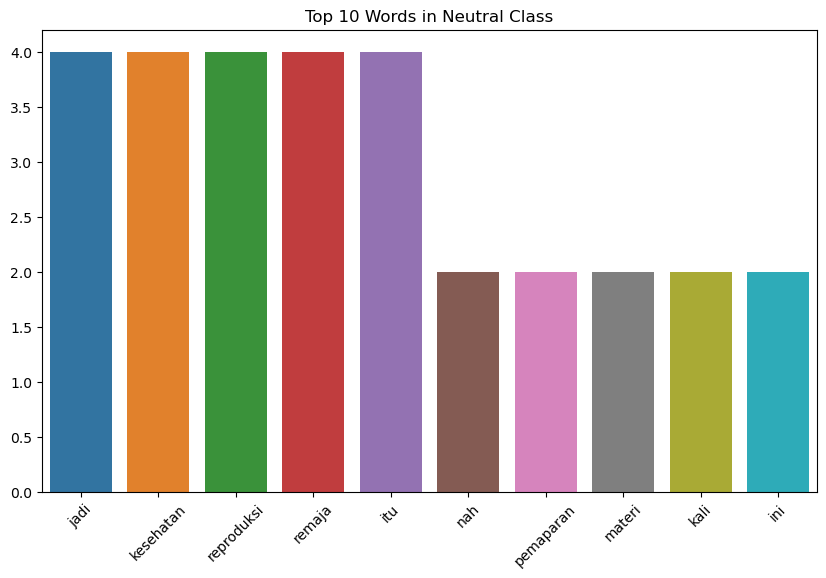

In [148]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def plot_top_n_words(data, n=10, title="Top N Words"):
    # Tokenize and flatten list of words
    words = [word for post in data for word in word_tokenize(post)]
    
    # Count frequencies
    freq = Counter(words)
    
    # Get top N words
    common_words = freq.most_common(n)
    words, counts = zip(*common_words)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Top 10 words for Positive Sentiments
plot_top_n_words(test[test['Sentiment'] == 'Positive']['posts'], title='Top 10 Words in Positive Sentiments')

# Top 10 words for Neutral Sentiments
plot_top_n_words(test[test['Sentiment'] == 'Neutral']['posts'], title='Top 10 Words in Neutral Sentiments')

# Top 10 words for Negative Sentiments
plot_top_n_words(test[test['Sentiment'] == 'Negative']['posts'], title='Top 10 Words in Neutral Sentiments')


# Top 10 words for Positive Class
plot_top_n_words(test[test['Class'] == 'Positive']['posts'], title='Top 10 Words in Positive Class')

# Top 10 words for Neutral Class
plot_top_n_words(test[test['Class'] == 'Neutral']['posts'], title='Top 10 Words in Neutral Class')

# Top 10 words for Negative Class
plot_top_n_words(test[test['Class'] == 'Negative']['posts'], title='Top 10 Words in Neutral Class')